In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,log_loss,roc_auc_score,f1_score

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no


From additional information we know the columns name:
Checking Account, Duration,Credit History,Purpose, Credit Amount, Saving Account, Present Emlployment since,Installment Rate(%),Personal Status and Sex, Other debtors/Guarantor, Present Residence since, Property, Age, Other installment plans, Housing, Number of existing credit at this Bank, Job, Dependent/liability, Telephone, Foreign Worker

In [2]:
data=pd.read_csv('german.data',sep=' ',header=None)
print(len(data.columns))
data.head()

21


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
columns=['Checking Account', 'Duration','Credit History','Purpose', 'Credit Amount', 'Saving Account', 'Present Emlployment since','Installment Rate(%)','Personal Status and Sex', 'Other debtors/Guarantor', 'Present Residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'Number of existing credit at this Bank', 'Job', 'Dependent/liability', 'Telephone', 'Foreign Worker','Credit Risk']
for item in range(21):
    data=data.rename(columns={item:columns[item]})
data.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Emlployment since,Installment Rate(%),Personal Status and Sex,Other debtors/Guarantor,...,Property,Age,Other installment plans,Housing,Number of existing credit at this Bank,Job,Dependent/liability,Telephone,Foreign Worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Let's Check for the missing Value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Checking Account                          1000 non-null object
Duration                                  1000 non-null int64
Credit History                            1000 non-null object
Purpose                                   1000 non-null object
Credit Amount                             1000 non-null int64
Saving Account                            1000 non-null object
Present Emlployment since                 1000 non-null object
Installment Rate(%)                       1000 non-null int64
Personal Status and Sex                   1000 non-null object
Other debtors/Guarantor                   1000 non-null object
Present Residence since                   1000 non-null int64
Property                                  1000 non-null object
Age                                       1000 non-null int64
Other installment plans                   1000 non-null object
Housing          

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment Rate(%),1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present Residence since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Number of existing credit at this Bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Dependent/liability,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Credit Risk,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


# Exploratory Data Analysis

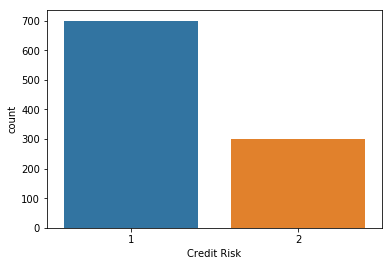

In [6]:
sns.countplot(data['Credit Risk'])

### 1 = Good Risk , 2= Bad Risk
### We have imbalance data because Good Risk data more than twice of Bad Risk

In [7]:
data.columns[0]

'Checking Account'

# Countplot Categorical Features

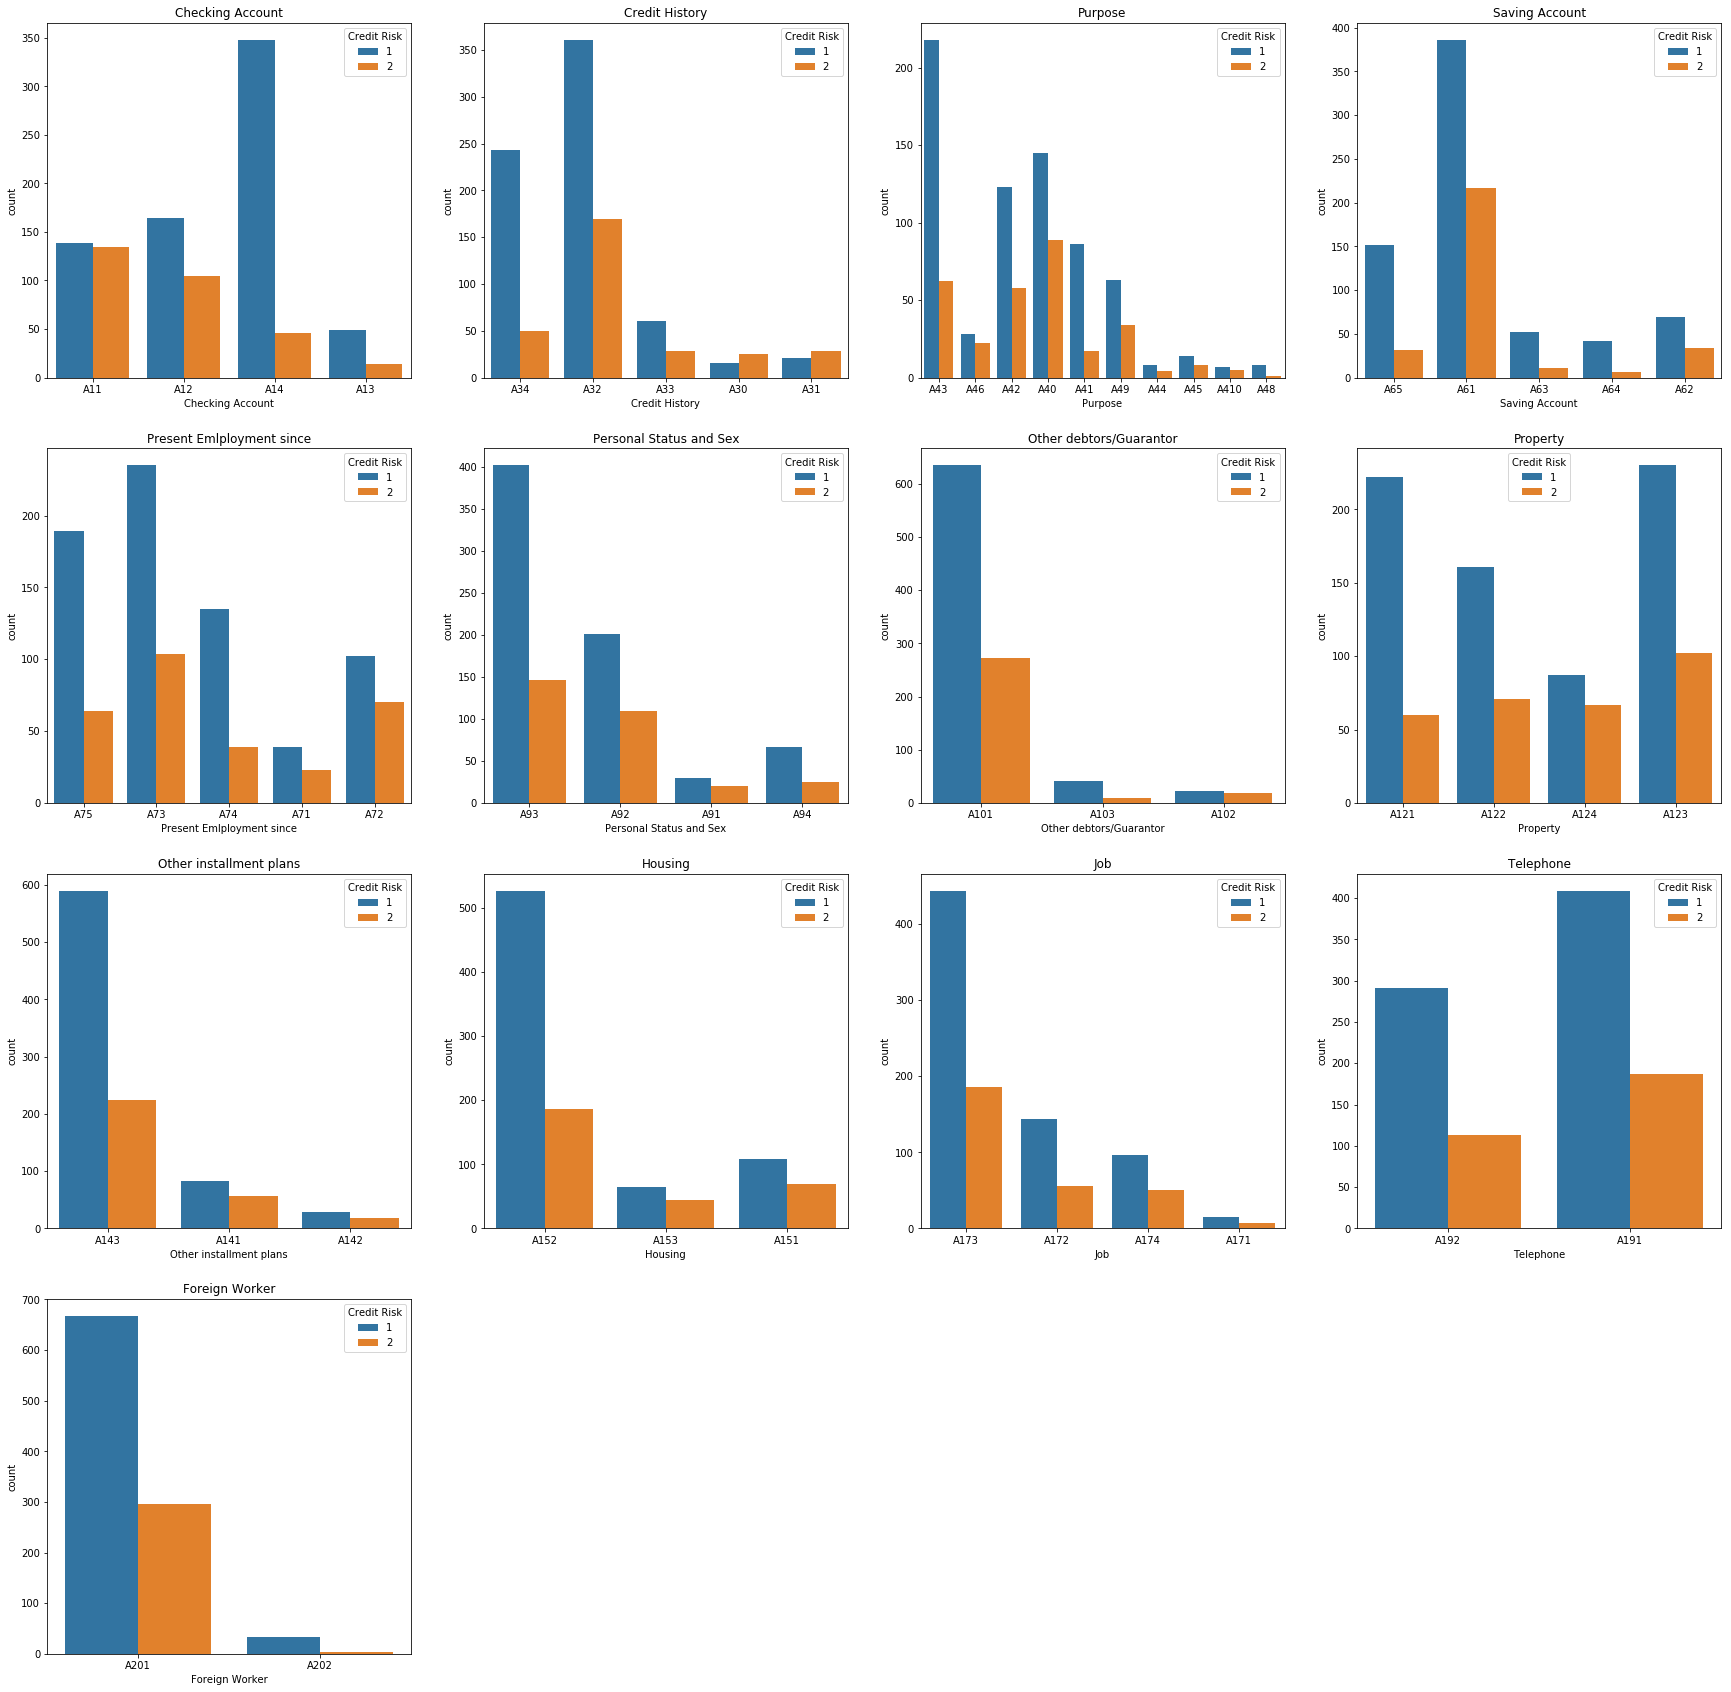

In [8]:
columnCat=[1,3,4,6,7,9,10,12,14,15,17,19,20]
plt.figure(figsize=(30,30))
for item in range(len(columnCat)):
    plt.subplot(4,4,item+1)
    plt.title(data.columns[(columnCat[item])-1])
    sns.countplot(x=data[data.columns[(columnCat[item])-1]],hue=data['Credit Risk'])
plt.show()

# Summary
1. People with No Checking account tend to be a Good Risk (A14) and people with checking account <0 DM have highest risk
2. People with existing credit paid fully and people that has credit in other bank tend to be a Good Risk (A34, A32) and unexpectedly people that pay all loan from previous credit have highest risk (A31,A32)
3. The Highest risk is credit for Education Purpose
4. Low Saving account has a chance to be a Bad Risk

Overall categorical features that might have high correlation with Credit risk are Saving account, credit history, credit purpose and saving account

# Numerical Features

## BoxPlot

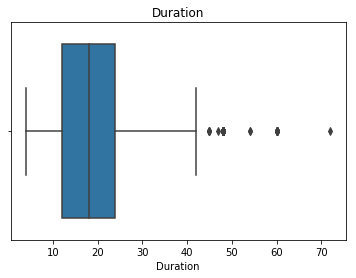

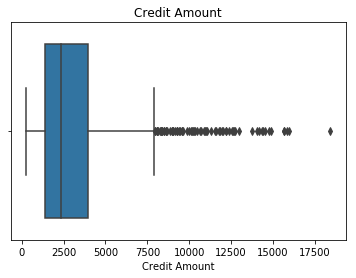

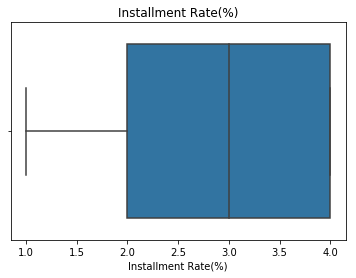

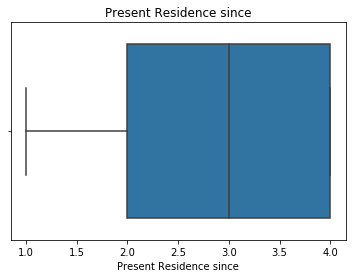

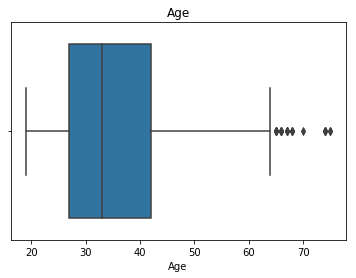

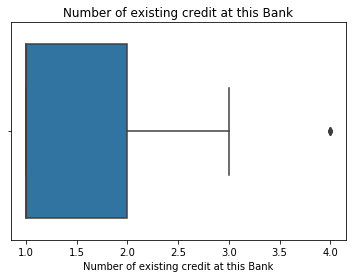

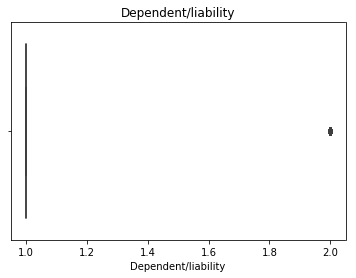

In [9]:
columnNum=[2,5,8,11,13,16,18]
for item in range(len(columnNum)):
    plt.title(data.columns[(columnNum[item])-1])
    sns.boxplot(x=data[data.columns[(columnNum[item])-1]],data=data)
    plt.show()

## Distplot

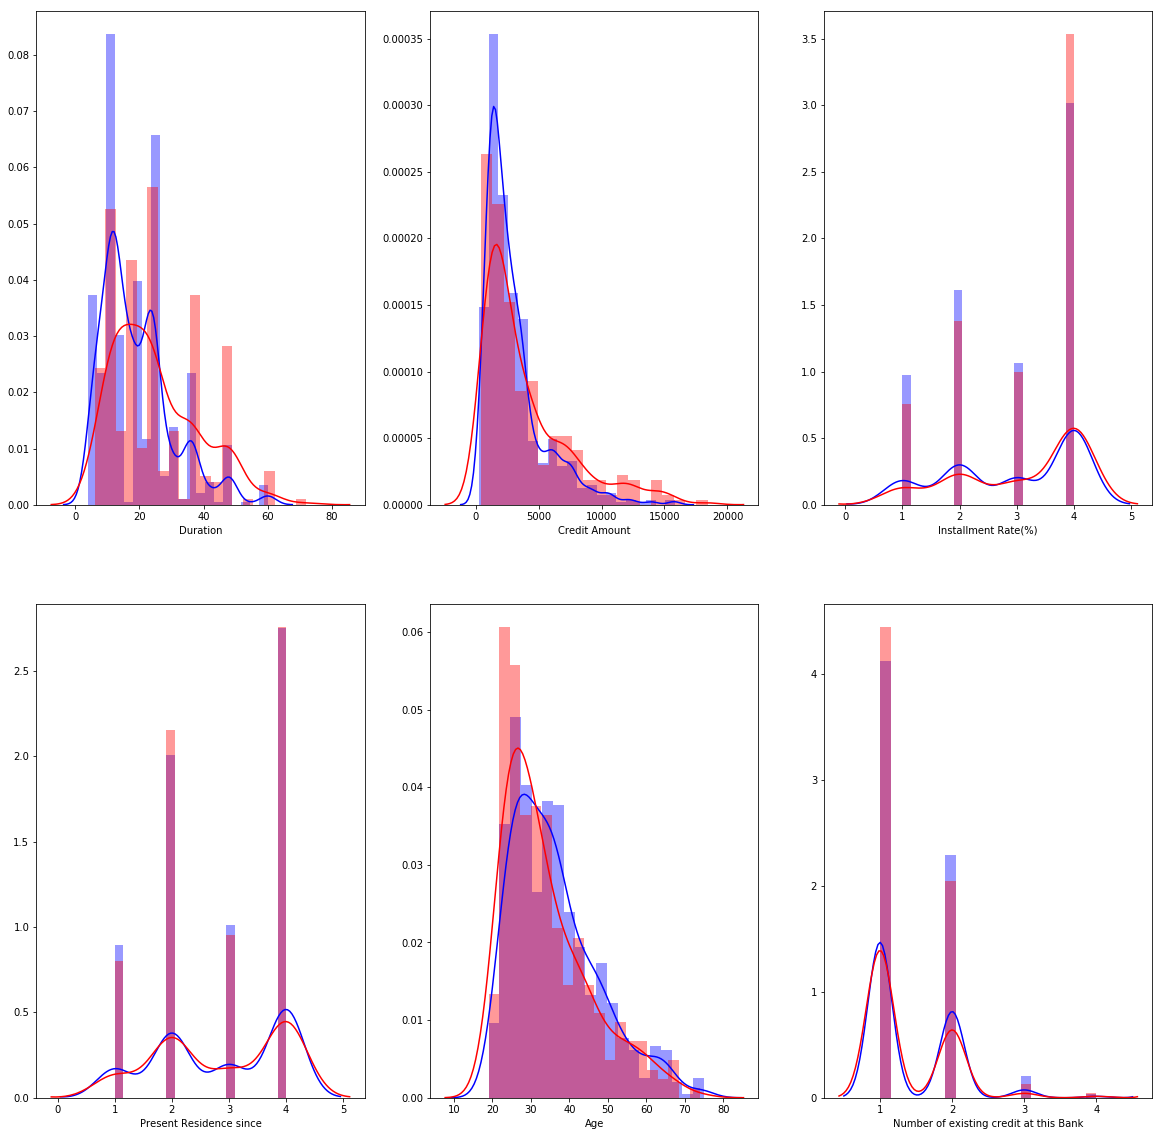

In [10]:
columnNum=[2,5,8,11,13,16]
plt.figure(figsize=(20,20))
for item in range(0,len(columnNum)):
    plt.subplot(2,3,item+1)
    sns.distplot(data[data['Credit Risk']==1][data.columns[(columnNum[item])-1]],kde=True,color='blue',bins=20)
    sns.distplot(data[data['Credit Risk']==2][data.columns[(columnNum[item])-1]],kde=True,color='red',bins=20)

## Summary
1. The Longer duration of credit the Risk also getting higher
2. Higher Credit amount tend to be a Bad Risk
3. Higher Installment rate tend to be a Bad Risk
4. Not significant but younger people tend to be a Bad Risk
5. More existing credit in this bank tend to be a Good Risk

 Number of Dependent and liability also numerical but this feature only has 2 values 1 and 2 so it's better if we just use countplot

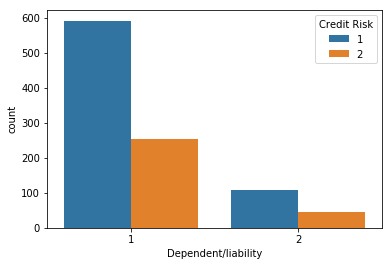

In [11]:
sns.countplot(data['Dependent/liability'],hue=data['Credit Risk'])

 Fewer number of dependent/liability tend to have a good risk
 
 ## Numerical features that might have high correlation with credit risk are Duration, Credit Amount, Installment Rate and Age

## Heatmap

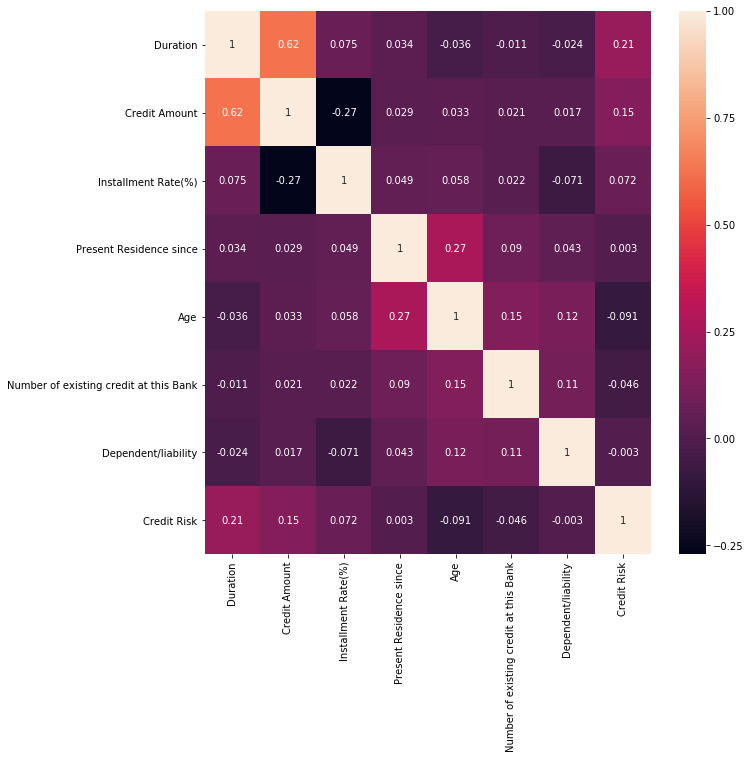

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

# Machine Learning

## Label Encoder

In [13]:
columnCat=[1,3,4,6,7,9,10,12,14,15,17,19,20,21]
label= preprocessing.LabelEncoder()
print(columnCat)
for item in columnCat:
    print(data.columns[item-1])
    data[data.columns[item-1]]=label.fit_transform(data[data.columns[item-1]])
data.head()

[1, 3, 4, 6, 7, 9, 10, 12, 14, 15, 17, 19, 20, 21]
Checking Account
Credit History
Purpose
Saving Account
Present Emlployment since
Personal Status and Sex
Other debtors/Guarantor
Property
Other installment plans
Housing
Job
Telephone
Foreign Worker
Credit Risk


,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Emlployment since,Installment Rate(%),Personal Status and Sex,Other debtors/Guarantor,...,Property,Age,Other installment plans,Housing,Number of existing credit at this Bank,Job,Dependent/liability,Telephone,Foreign Worker,Credit Risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1


## Train Test Split

In [14]:
xtrain,xtes,ytrain,ytes=train_test_split(data.drop('Credit Risk',axis=1),data['Credit Risk'],test_size=0.30)

## Decision Tree

In [15]:
from sklearn import tree
DCT=tree.DecisionTreeClassifier()
DCT.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

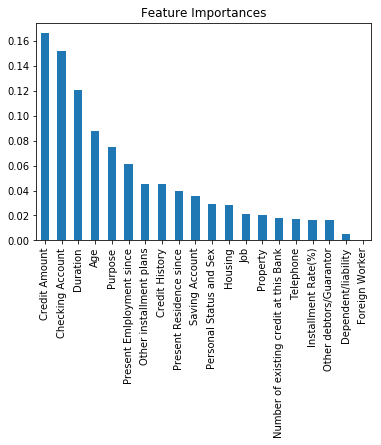

In [16]:
coef1=pd.Series(DCT.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

From Random Forest Most important features to deterimine wether good or bad risk is credit amount and checking account

In [17]:
predictTesDCT=DCT.predict(xtes)
predictProbDCT=DCT.predict_proba(xtes)
conDCT=pd.DataFrame(data=confusion_matrix(ytes,predictTesDCT),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conDCT)
print(classification_report(ytes,predictTesDCT))

           Good Risk  Bad Risk
Good Risk        157        56
Bad Risk          45        42
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       213
           1       0.43      0.48      0.45        87

    accuracy                           0.66       300
   macro avg       0.60      0.61      0.61       300
weighted avg       0.68      0.66      0.67       300



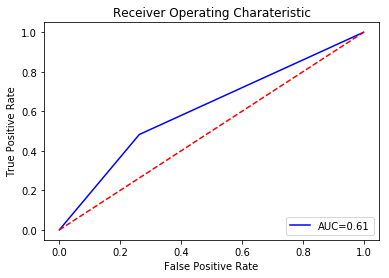

log_loss= 11.628203977806901


In [18]:
preds=predictProbDCT[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('log_loss=',log_loss(ytes,predictProbDCT[:,1]))

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=50)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

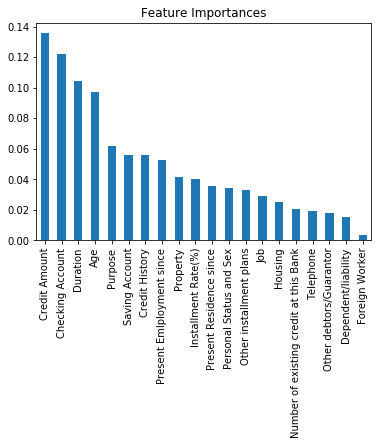

In [20]:
coef1=pd.Series(rfc.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

Almost same with Decision Tree

In [21]:
predictTesRFC=rfc.predict(xtes)
predictProbRFC=rfc.predict_proba(xtes)
conRFC=pd.DataFrame(data=confusion_matrix(ytes,predictTesRFC),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conRFC)
print(classification_report(ytes,predictTesRFC))

           Good Risk  Bad Risk
Good Risk        192        21
Bad Risk          51        36
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       213
           1       0.63      0.41      0.50        87

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.74      0.76      0.74       300



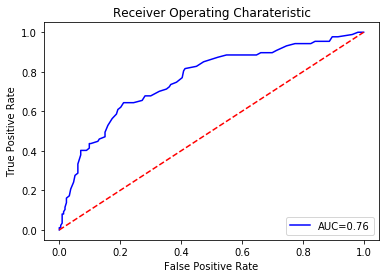

log_loss= 0.5197794195040905


In [22]:
preds=predictProbRFC[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('log_loss=',log_loss(ytes,predictProbRFC[:,1]))

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',max_iter=10000)
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predictTesLR=logmodel.predict(xtes)
predictProbLR=logmodel.predict_proba(xtes)
con=pd.DataFrame(data=confusion_matrix(ytes,predictTesLR),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(con)
print(classification_report(ytes,predictTesLR))

           Good Risk  Bad Risk
Good Risk        177        36
Bad Risk          49        38
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       213
           1       0.51      0.44      0.47        87

    accuracy                           0.72       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.70      0.72      0.71       300



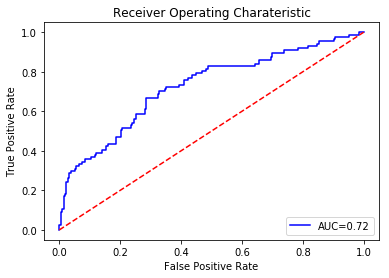

log_loss= 0.5605660054695096


In [25]:
preds=predictProbLR[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('log_loss=',log_loss(ytes,predictProbLR[:,1]))

In [26]:
from sklearn.model_selection import KFold

K=10
kf=KFold(n_splits=K,shuffle=True,random_state=42)
target=data['Credit Risk']
data=data.drop('Credit Risk',axis=1)

def calc_train_error(xtrain,ytrain,model):
    predictions=model.predict(xtrain)
    predictProba=model.predict_proba(xtrain)
    accuracy=accuracy_score(ytrain,predictions)
    f1=f1_score(ytrain,predictions,average='macro')
    roc_auc=roc_auc_score(ytrain,predictProba[:,1])
    logloss=log_loss(ytrain,predictProba[:,1])
    report=classification_report(ytrain,predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }
def calc_validation_error(xtes,ytes,model):
    predictions=model.predict(xtes)
    predictProba=model.predict_proba(xtes)
    accuracy=accuracy_score(ytes,predictions)
    f1=f1_score(ytes,predictions,average='macro')
    roc_auc=roc_auc_score(ytes,predictProba[:,1])
    logloss=log_loss(ytes,predictProba[:,1])
    report=classification_report(ytes,predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }
def calc_metrics(xtrain,ytrain,xtes,ytes,model):
    model.fit(xtrain,ytrain)
    train_error=calc_train_error(xtrain,ytrain,model)
    validation_error=calc_validation_error(xtes,ytes,model)
    return train_error,validation_error

In [27]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    x_train,x_val=data.iloc[train_index],data.iloc[val_index]
    y_train,y_val=target.iloc[train_index],target.iloc[val_index]
    
#     print(len(x_val),len(x_train)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(x_train,y_train,x_val,y_val,logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfLR = []
for tr,val in zip(train_errors, validation_errors):
    dfLR.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfLR = pd.DataFrame(dfLR, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfLR

,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.687541,0.704788,0.793845,0.867411,0.486393,0.420209,0.762222,0.77
1,0.679864,0.697329,0.804004,0.775714,0.478721,0.499803,0.757778,0.77
2,0.688675,0.720954,0.801997,0.808364,0.476488,0.505900,0.764444,0.78
3,0.693568,0.698614,0.805481,0.759513,0.478541,0.488623,0.762222,0.80
4,0.710751,0.594115,0.813275,0.705197,0.470199,0.569556,0.775556,0.68
5,0.706667,0.651400,0.807958,0.741087,0.468822,0.577575,0.780000,0.71
6,0.726243,0.578059,0.809047,0.736307,0.475394,0.514930,0.783333,0.72
7,0.670136,0.786834,0.790029,0.863971,0.488904,0.436910,0.754444,0.83
8,0.701348,0.733333,0.803543,0.773333,0.481564,0.471279,0.768889,0.80
9,0.689910,0.693289,0.801444,0.799560,0.475632,0.526346,0.767778,0.75


## XGBOOST

In [28]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

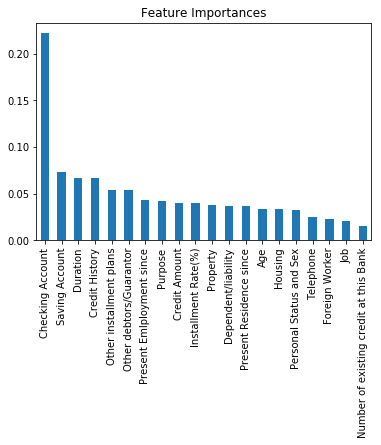

In [29]:
coef1=pd.Series(xgb.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

With XGBoost the most important feature is Checking Account

In [30]:
predictTesXGB=xgb.predict(xtes)
predictProbXGB=xgb.predict_proba(xtes)
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTesXGB),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conXG)
print(classification_report(ytes,predictTesXGB))

           Good Risk  Bad Risk
Good Risk        178        35
Bad Risk          41        46
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       213
           1       0.57      0.53      0.55        87

    accuracy                           0.75       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.74      0.75      0.74       300



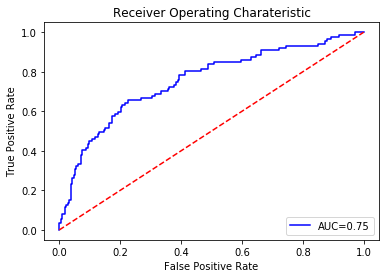

log_loss= 0.5348788778825353


In [31]:
preds=predictProbXGB[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('log_loss=',log_loss(ytes,predictProbXGB[:,1]))

# Dealing with Imbalance Data Using GridSearch

## Decision Tree

In [32]:
from sklearn.model_selection import GridSearchCV
parameters={'class_weight':({0:1,1:3},{0:1,1:5},{0:1,1:7},{0:1,1:10}),
            'min_samples_leaf':(20,22,25)}
dt=GridSearchCV(DCT,parameters,
               scoring='accuracy',
               cv=5)
dt.fit(xtrain,ytrain)
DCT=dt.best_estimator_
dt.best_estimator_

C:\Users\Denny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    x_train,x_val=data.iloc[train_index],data.iloc[val_index]
    y_train,y_val=target.iloc[train_index],target.iloc[val_index]
    
#     print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(x_train,y_train,x_val,y_val,DCT)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfDCT = []
for tr,val in zip(train_errors, validation_errors):
    dfDCT.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfDCT = pd.DataFrame(dfDCT, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfDCT

,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.690660,0.648615,0.830604,0.821515,0.539660,0.552643,0.702222,0.66
1,0.698946,0.656800,0.840344,0.697619,0.525551,1.628720,0.712222,0.68
2,0.667555,0.610016,0.834702,0.718061,0.526442,0.948036,0.676667,0.62
3,0.715939,0.630451,0.841609,0.721715,0.525463,1.330686,0.731111,0.65
4,0.693774,0.610016,0.843434,0.669985,0.520981,1.093061,0.704444,0.62
5,0.724229,0.478121,0.847666,0.574066,0.506756,1.453957,0.747778,0.48
6,0.685834,0.549550,0.833072,0.686335,0.542028,0.986572,0.694444,0.58
7,0.703821,0.689955,0.838560,0.774816,0.527807,0.625582,0.718889,0.70
8,0.671946,0.553896,0.840250,0.743200,0.526735,1.308056,0.677778,0.57
9,0.708896,0.669285,0.838984,0.768791,0.524838,0.583259,0.724444,0.68


## Random Forest

In [34]:
parameters={'class_weight':({0:1,1:3},{0:1,1:5},{0:1,1:7}),
            'min_samples_leaf':(2,3,4)}
rfc=RandomForestClassifier(n_estimators=100,random_state=101)
dt=GridSearchCV(rfc,parameters,
               scoring='accuracy',cv=5)
dt.fit(xtrain,ytrain)
rfc=dt.best_estimator_
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [35]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    x_train,x_val=data.iloc[train_index],data.iloc[val_index]
    y_train,y_val=target.iloc[train_index],target.iloc[val_index]
    
#     print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(x_train,y_train,x_val,y_val,rfc)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfRFC = []
for tr,val in zip(train_errors, validation_errors):
    dfRFC.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfRFC = pd.DataFrame(dfRFC, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfRFC

,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.989506,0.761905,0.999742,0.868383,0.237826,0.442781,0.991111,0.80
1,0.990789,0.689147,0.999700,0.800476,0.236636,0.499327,0.992222,0.77
2,0.994709,0.695586,0.999711,0.779412,0.231564,0.532600,0.995556,0.76
3,0.992161,0.725877,0.999743,0.795535,0.239083,0.472290,0.993333,0.80
4,0.993434,0.619679,0.999660,0.730452,0.230909,0.548137,0.994444,0.69
5,0.989303,0.665775,0.999743,0.695671,0.230418,0.599789,0.991111,0.70
6,0.987064,0.708625,0.999334,0.793902,0.238953,0.475615,0.988889,0.80
7,0.989440,0.781447,0.999185,0.870864,0.239626,0.451191,0.991111,0.82
8,0.989570,0.749967,0.999599,0.824000,0.236273,0.450489,0.991111,0.81
9,0.991995,0.751244,0.999768,0.841758,0.234348,0.474459,0.993333,0.78


## XGBOOST

In [36]:
parameters={'max_depth':(1,2,3),
            'min_child_weight':(3,4,5)}
dt=GridSearchCV(xgb,parameters,
               scoring='accuracy',
               cv=5)
dt.fit(xtrain,ytrain)
xgb=dt.best_estimator_
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    x_train,x_val=data.iloc[train_index],data.iloc[val_index]
    y_train,y_val=target.iloc[train_index],target.iloc[val_index]
    
#     print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(x_train,y_train,x_val,y_val,xgb)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfXGB = []
for tr,val in zip(train_errors, validation_errors):
    dfXGB.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfXGB = pd.DataFrame(dfXGB, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfXGB

,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.782135,0.727183,0.880332,0.864497,0.415389,0.427614,0.834444,0.78
1,0.759858,0.688935,0.884944,0.791429,0.406715,0.494839,0.817778,0.79
2,0.784440,0.636175,0.886312,0.789062,0.405438,0.516416,0.836667,0.72
3,0.773016,0.758891,0.884204,0.809741,0.412620,0.447806,0.825556,0.84
4,0.795553,0.636175,0.892191,0.727538,0.399264,0.543632,0.842222,0.72
5,0.777778,0.664002,0.891473,0.712224,0.393618,0.616651,0.833333,0.71
6,0.783516,0.608198,0.887380,0.762846,0.406027,0.470078,0.831111,0.74
7,0.765483,0.670218,0.876175,0.814798,0.417937,0.477999,0.823333,0.74
8,0.781754,0.737762,0.880553,0.830400,0.415534,0.425660,0.831111,0.82
9,0.767236,0.728742,0.885111,0.829011,0.407348,0.488035,0.827778,0.77


# Compare Model

In [38]:
outside = ['f1', 'f1', 'f1','f1', 'f1',
          'f1','f1','f1','f1','f1','f1','f1', 'ROC_AUC','ROC_AUC', 'ROC_AUC',
          'ROC_AUC','ROC_AUC','ROC_AUC', 'ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','logloss',
          'logloss','logloss',
          'logloss','logloss','logloss','logloss','logloss','logloss','logloss','logloss','logloss','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
inside = [1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std']
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['ROC_AUC', 'accuracy', 'f1', 'logloss'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Avg', 'Std']],
           codes=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [39]:
f1=[]
roc=[]
logloss=[]
accuracy=[]
kol = {
    'f1' : 'f1 test',
    'ROC_AUC' : 'Test ROC AUC',
    'logloss' : 'Test log_loss',
    'accuracy' : 'Test accuracy'
}
for item1,item2,item3,item4 in zip(dfRFC.values,dfXGB.values,dfDCT.values,dfLR.values):
    f1.append([item1[1],item2[1],item3[1],item4[1]])
    roc.append([item1[3],item2[3],item3[3],item4[3]])
    logloss.append([item1[5],item2[5],item3[5],item4[5]])
    accuracy.append([item1[7],item2[7],item3[7],item4[7]])

for i,j in zip([f1,roc,logloss,accuracy], ['f1','ROC_AUC','logloss','accuracy']):
    i.append([dfRFC[kol[j]].mean(), dfXGB[kol[j]].mean(),dfDCT[kol[j]].mean(),dfLR[kol[j]].mean()])
    i.append([dfRFC[kol[j]].std(), dfXGB[kol[j]].std(),dfDCT[kol[j]].std(),dfLR[kol[j]].std()])
    
dfEval = pd.concat([pd.DataFrame(f1),pd.DataFrame(roc),pd.DataFrame(logloss),pd.DataFrame(accuracy)], axis=0)
dfEval.columns = ['RFC','XGB','DCT','LR']
dfEval.index = hier_index
dfEval

RFC       XGB       DCT        LR
f1       1    0.761905  0.727183  0.648615  0.704788
         2    0.689147  0.688935  0.656800  0.697329
         3    0.695586  0.636175  0.610016  0.720954
         4    0.725877  0.758891  0.630451  0.698614
         5    0.619679  0.636175  0.610016  0.594115
         6    0.665775  0.664002  0.478121  0.651400
         7    0.708625  0.608198  0.549550  0.578059
         8    0.781447  0.670218  0.689955  0.786834
         9    0.749967  0.737762  0.553896  0.733333
         10   0.751244  0.728742  0.669285  0.693289
         Avg  0.714925  0.685628  0.609670  0.685871
         Std  0.049289  0.050853  0.065149  0.062906
ROC_AUC  1    0.868383  0.864497  0.821515  0.867411
         2    0.800476  0.791429  0.697619  0.775714
         3    0.779412  0.789062  0.718061  0.808364
         4    0.795535  0.809741  0.721715  0.759513
         5    0.730452  0.727538  0.669985  0.705197
         6    0.695671  0.712224  0.574066  0.741087
         7    0.793902  0.762846  0.686335  0.736307
         8    0.870864  0.814798  0.774816  0.863971
         9    0.824000  0.830400  0.743200  0.773333
         10   0.841758  0.829011  0.768791  0.799560
         Avg  0.800045  0.793155  0.717610  0.783046
         Std  0.055996  0.047493  0.067996  0.053007
logloss  1    0.442781  0.427614  0.552643  0.420209
         2    0.499327  0.494839  1.628720  0.499803
         3    0.532600  0.516416  0.948036  0.505900
         4    0.472290  0.447806  1.330686  0.488623
         5    0.548137  0.543632  1.093061  0.569556
         6    0.599789  0.616651  1.453957  0.577575
         7    0.475615  0.470078  0.986572  0.514930
         8    0.451191  0.477999  0.625582  0.436910
         9    0.450489  0.425660  1.308056  0.471279
         10   0.474459  0.488035  0.583259  0.526346
         Avg  0.494668  0.490873  1.051057  0.501113
         Std  0.050746  0.057723  0.380800  0.050659
accuracy 1    0.800000  0.780000  0.660000  0.770000
         2    0.770000  0.790000  0.680000  0.770000
         3    0.760000  0.720000  0.620000  0.780000
         4    0.800000  0.840000  0.650000  0.800000
         5    0.690000  0.720000  0.620000  0.680000
         6    0.700000  0.710000  0.480000  0.710000
         7    0.800000  0.740000  0.580000  0.720000
         8    0.820000  0.740000  0.700000  0.830000
         9    0.810000  0.820000  0.570000  0.800000
         10   0.780000  0.770000  0.680000  0.750000
         Avg  0.773000  0.763000  0.624000  0.761000
         Std  0.044981  0.044485  0.066366  0.046296

In [40]:
for item in ['ROC_AUC', 'accuracy', 'f1', 'logloss']:
    print('Average of {}'.format(item))
    print(dfEval.loc[item].loc['Avg'])

Average of ROC_AUC
RFC    0.800045
XGB    0.793155
DCT    0.717610
LR     0.783046
Name: Avg, dtype: float64
Average of accuracy
RFC    0.773
XGB    0.763
DCT    0.624
LR     0.761
Name: Avg, dtype: float64
Average of f1
RFC    0.714925
XGB    0.685628
DCT    0.609670
LR     0.685871
Name: Avg, dtype: float64
Average of logloss
RFC    0.494668
XGB    0.490873
DCT    1.051057
LR     0.501113
Name: Avg, dtype: float64


### From the Evaluation Random forest outperform all other models so we will use Random Forest as our final model

# Test Evaluation Random Forest with Gridsearch

In [41]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

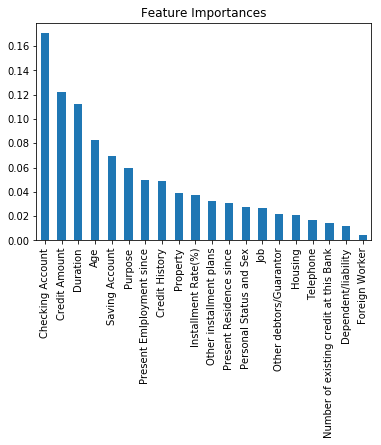

In [42]:
coef1=pd.Series(rfc.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [43]:
predictTesRFC=rfc.predict(xtes)
predictProbRFC=rfc.predict_proba(xtes)
conRFC=pd.DataFrame(data=confusion_matrix(ytes,predictTesRFC),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conRFC)
print(classification_report(ytes,predictTesRFC))

           Good Risk  Bad Risk
Good Risk        183        30
Bad Risk          40        47
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       213
           1       0.61      0.54      0.57        87

    accuracy                           0.77       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.76      0.77      0.76       300



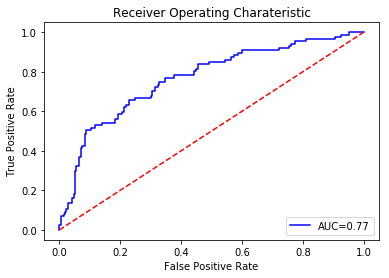

log_loss= 0.517807089810279


In [44]:
preds=predictProbRFC[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('log_loss=',log_loss(ytes,predictProbRFC[:,1]))


Train Scores:
[[0.9962963  0.99259259 0.99259259 0.98518519 0.98518519 0.98518519
  0.98518519 0.98518519 0.98518519 0.98518519]
 [0.99259259 0.99506173 0.99259259 0.99259259 0.99012346 0.99259259
  0.99259259 0.99259259 0.99259259 0.99259259]
 [0.9962963  0.99259259 0.98888889 0.99259259 0.9962963  0.98703704
  0.99259259 0.99259259 0.99259259 0.99259259]
 [0.99259259 0.98814815 0.99259259 0.98962963 0.99555556 0.99407407
  0.99555556 0.99407407 0.99407407 0.99407407]
 [0.98518519 0.98765432 0.99506173 0.98888889 0.99382716 0.99259259
  0.98641975 0.99012346 0.99382716 0.98888889]]

train Mean: 
[0.98777778 0.99259259 0.99240741 0.99303704 0.99024691]

Train Size: 
[270 405 540 675 810]

Train Std: 
[0.00407407 0.00110423 0.00267719 0.00229988 0.00324059]

Test Scores:
[[0.75 0.68 0.78 0.73 0.74 0.74 0.7  0.76 0.76 0.77]
 [0.76 0.75 0.77 0.74 0.77 0.75 0.74 0.77 0.73 0.71]
 [0.75 0.73 0.74 0.75 0.79 0.78 0.74 0.79 0.77 0.77]
 [0.76 0.68 0.75 0.76 0.74 0.78 0.7  0.84 0.78 0.75]
 [0.77

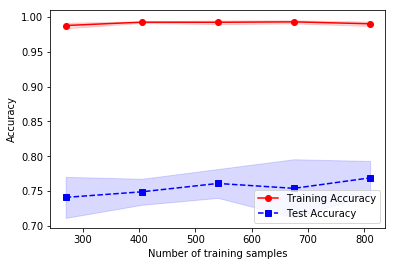

In [45]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(estimator=rfc,
                                                   X=data,
                                                   y=target,
                                                   train_sizes=np.linspace(0.3,0.9,5),
                                                   cv=10,
                                                   scoring='accuracy')
print('\nTrain Scores:')
print(train_scores)
#Mean value of accuracy against training data
train_mean=np.mean(train_scores,axis=1)
print('\ntrain Mean: ')
print(train_mean)
print('\nTrain Size: ')
print(train_sizes)
#Standard deviation of training accuracy per number of training samples
train_std=np.std(train_scores,axis=1)
print('\nTrain Std: ')
print(train_std)

#Same as data above for test data
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
print('\nTest Scores:')
print(test_scores)
print('\nTest Mean: ')
print(test_mean)
print('\nTest Std: ')
print(test_std)

#Plot training accuracies
plt.plot(train_sizes,train_mean,color='red',marker='o',label='Training Accuracy')
#Plot the variances of training accuracies
plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,color='red')
#Plot for test data as training data
plt.plot(train_sizes,test_mean,color='blue',linestyle='--',marker='s',
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean+test_std,
                test_mean-test_std,
                alpha=0.15,color='blue')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Change Threshold

### Depends on the purpose we can change threshold to have our model focus on predict bad risk or good risk in this example lets say we dont want any bad credit predicted as good credit so we will raise recall on bad credit although this will make many good credit predicted as bad credit because our model tend to predict bad risk.

In [46]:
listItem=[]
for item1,item2,item3 in zip(tpr,fpr,threshold):
    listItem.append([item1,item2,item3])
dftpr=pd.DataFrame(columns=['TPR','FPR','Threshold'],data=listItem)
# dftpr[dftpr['Threshold']<0.0382987]
dftpr

,TPR,FPR,Threshold
0,0.000000,0.000000,1.849336
1,0.011494,0.000000,0.849336
2,0.022989,0.000000,0.811443
3,0.022989,0.004695,0.801980
4,0.068966,0.004695,0.751226
5,0.068966,0.014085,0.745794
6,0.080460,0.014085,0.745390
7,0.080460,0.018779,0.742676
8,0.091954,0.018779,0.737302
9,0.091954,0.023474,0.732792


### Set The Threshold

In [47]:
predictTreshold=[]
for item in predictProbRFC:
    if item[1]>=0.240:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)
predictTreshold[:5]

[1, 0, 0, 1, 1]

In [48]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTreshold),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conXG)
print(classification_report(ytes,predictTreshold))

           Good Risk  Bad Risk
Good Risk         98       115
Bad Risk          13        74
              precision    recall  f1-score   support

           0       0.88      0.46      0.60       213
           1       0.39      0.85      0.54        87

    accuracy                           0.57       300
   macro avg       0.64      0.66      0.57       300
weighted avg       0.74      0.57      0.59       300



### Or maybe We dont want any Good Risk predicted as Bad Risk

In [49]:
predictTreshold=[]
for item in predictProbRFC:
    if item[1]>=0.5970:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)
predictTreshold[:5]

[0, 0, 0, 0, 0]

In [50]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTreshold),columns=['Good Risk','Bad Risk'],index=['Good Risk','Bad Risk']);
print(conXG)
print(classification_report(ytes,predictTreshold))

           Good Risk  Bad Risk
Good Risk        198        15
Bad Risk          54        33
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       213
           1       0.69      0.38      0.49        87

    accuracy                           0.77       300
   macro avg       0.74      0.65      0.67       300
weighted avg       0.76      0.77      0.75       300

